In [2449]:
import numpy as np
import scipy as scp
from scipy.integrate import solve_ivp
from shpm2 import SHPM, Hberg
import matplotlib.pyplot as plt
from matplotlib.colors import CenteredNorm

from lds import lds

from sktime.distances import dtw_distance

In [2450]:
def plot_eigs(A: np.array):

    eigs = np.linalg.eigvals(A)
    eigs_r = np.real(eigs)
    eigs_i = np.imag(eigs)

    plt.scatter(eigs_r, eigs_i)    
    plt.xlim((np.min(eigs_r), 1.0))
    ymin = np.min([-5.0, np.min(eigs_i)])
    plt.ylim((ymin, -ymin))

    plt.vlines([0.0], colors="black", linestyles="--", ymin=ymin, ymax=-ymin)
    
    plt.show()

In [2451]:
r_0 = 5
r_max = 100
def gain(x):

    return np.where(x < 0, r_0 * np.tanh(x / r_0), (r_max - r_0) * np.tanh(x / (r_max - r_0)))     

In [2452]:
n = 30

In [2453]:
shpm = SHPM(n)

In [2454]:
p = shpm.random_point()
p_ = shpm.mutate(p, 0.5, verbose=True)
# p_ = shpm.random_point()

swapped: 4 <-> 21
split


In [2455]:
pc = shpm.crossover(p, p_)

In [2456]:
T = shpm.hberg.assemble(p[1])

In [2457]:
A = shpm.assemble(p)
A_ = shpm.assemble(p_)
Ac = shpm.assemble(pc)

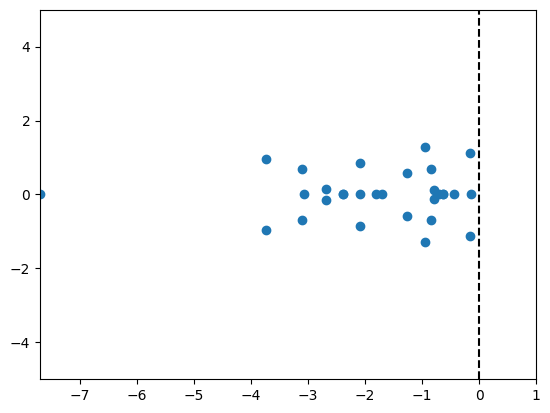

In [2458]:
plot_eigs(A)

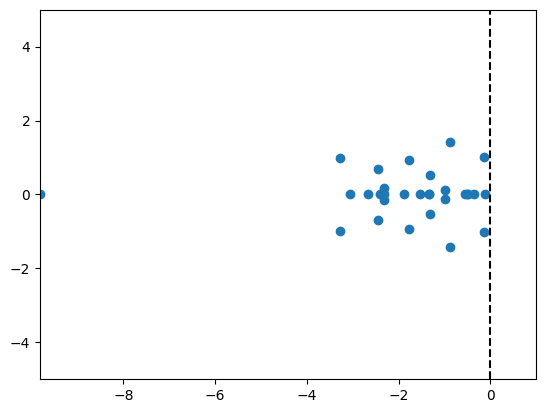

In [2459]:
plot_eigs(A_)

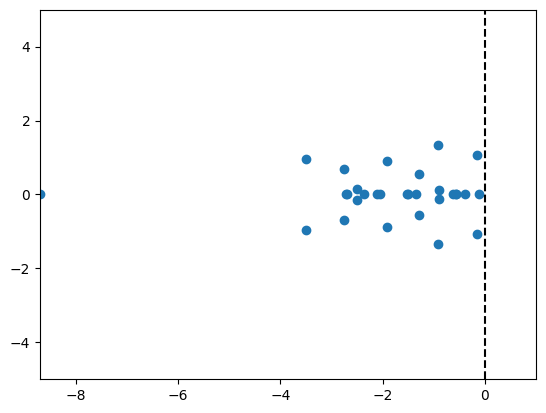

In [2460]:
plot_eigs(Ac)

In [2461]:
x_0_ = np.random.normal(0.0, 1.0, (n,))

In [2469]:
x_0 = 10.0 * x_0_
t_end=3.0
num_points=200
t_eval_range = np.linspace(0.0, t_end, num=num_points)

In [2476]:
ivp_out =  solve_ivp(lambda t, y: 1.0 * A @ gain(y) - y, (0.0, t_end), x_0, t_eval=t_eval_range)
ivp_out_ = solve_ivp(lambda t, y: 1.0 * A_ @ gain(y) - y, (0.0, t_end), x_0, t_eval=t_eval_range)
ivp_outc = solve_ivp(lambda t, y: 1.0 * Ac @ gain(y) - y, (0.0, t_end), x_0, t_eval=t_eval_range)
# ivp_out  = solve_ivp(lambda t, y: 10.0 * A @ y - y, (0.0, t_end), x_0, t_eval=t_eval_range)
# ivp_out_ = solve_ivp(lambda t, y: 10.0 * A_ @ y - y, (0.0, t_end), x_0, t_eval=t_eval_range)
# ivp_outc = solve_ivp(lambda t, y: 10.0 * Ac @ y - y, (0.0, t_end), x_0, t_eval=t_eval_range)

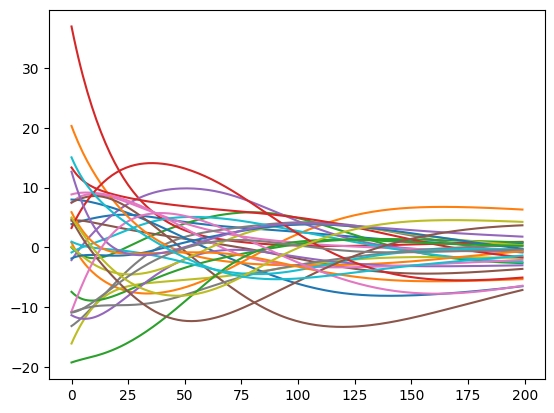

In [2477]:
plt.plot(ivp_out.y.T)
plt.show()

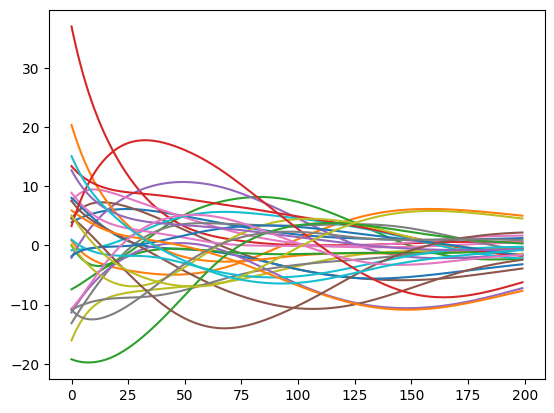

In [2478]:
plt.plot(ivp_out_.y.T)
plt.show()

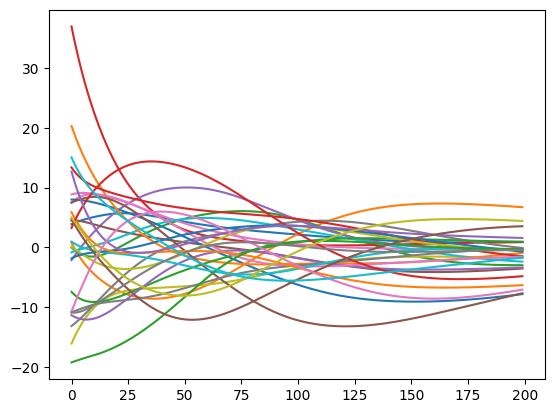

In [2479]:
plt.plot(ivp_outc.y.T)
plt.show()

In [2480]:
dis = dtw_distance(x=ivp_out.y, y=ivp_out_.y)

In [2481]:
dis / num_points

np.float64(152.1305118560568)